In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad, dblquad
from sympy import integrate, symbols, sin, exp

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
f1 = lambda x: 1/np.sqrt(np.tan(x))

a1, b1 = 1e-4, np.pi/2

x = np.linspace(a1, b1, 800)

y = f1(x)
integral_simpson = simpson(y, x=x)
integral_trapecio = trapezoid(y, x)
print(f"Metodo simpson desde 0 a pi/2: {integral_simpson}")
print(f"Metodo trapezoidal desde 0 a pi/2: {integral_trapecio}")

Metodo simpson desde 0 a pi/2: 2.2279839306990463
Metodo trapezoidal desde 0 a pi/2: 2.2520757829898423


In [ ]:
f = lambda x: 1 / np.sqrt(np.tan(x))
a, b = 0, np.pi/2
integral, error = quad(f, a, b)
print(f"Metodo quadratura desde 0 a pi/2: {integral}")
print(f"Error estimado: {error}")

Metodo quadratura desde 0 a pi/2: 2.2214414690792026
Error estimado: 4.1406478246130973e-10


In [ ]:
a2, b2 = 1, np.inf
f2 = lambda x: np.cos(x)/x**3
integral, error = quad(f2, a2, b2)
print(f"Metodo quadratura desde 1 a infinito: {integral}")
print(f"Error estimado: {error}")

Metodo quadratura desde 1 a infinito: 0.01811792007976691
Error estimado: 1.4789016823564538e-06


<ipython-input-5-48d1f905ec80>:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, error = quad(f2, a2, b2)


In [ ]:
f3 = lambda x, y: 1/np.sqrt(1-y**2)
a3, b3 = 0, np.pi/4
x3 = np.linspace(a3, b3, 800)
gfun = lambda x: 0
hfun = lambda x: np.sin(x)
integral, error = dblquad(f3, a3, b3, gfun, hfun)
print(f"Metodo quadratura desde 0 a pi/4: {integral}")
print(f"Error estimado: {error}")


Metodo quadratura desde 0 a pi/4: 0.36033449485443175
Error estimado: 2.086185191196123e-11


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



t**3/3 - 5*t**2 + 45*t
<function _lambdifygenerated at 0x7d8ad8a76480>


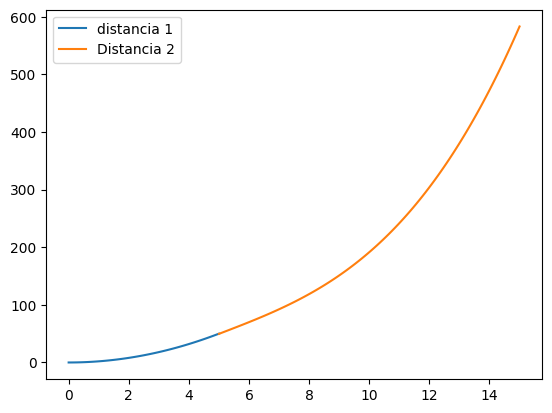

In [ ]:
#Aquí va su código
t = sp.symbols('t')
f1 = 4*t
f2 = 20 + ((5-t)**2)
t1 = np.linspace(0, 5, 100)
t2 = np.linspace(5, 15, 100)
x1 = integrate(f1)
x2 = integrate(f2)
print(x2)
x1 = sp.lambdify(t, x1)
x2 = sp.lambdify(t, x2)
print(x2)
plt.plot(t1, x1(t1), label='distancia 1')
plt.plot(t2, x2(t2)-92, label='Distancia 2') #La linea no era continua
plt.legend()
plt.show()



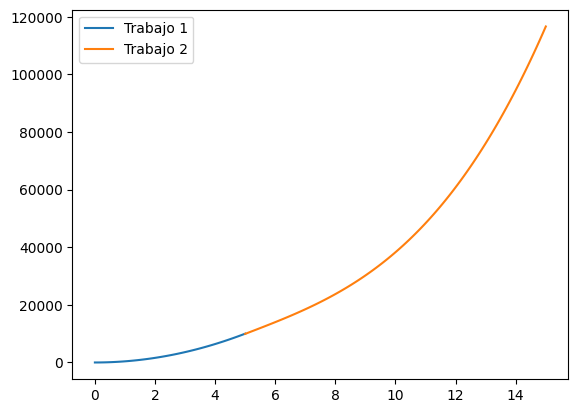

In [ ]:
plt.plot(t1, 200*(x1(t1)), label='Trabajo 1')
plt.plot(t2, 200*(x2(t2)-92), label='Trabajo 2') #
plt.legend()
plt.show()

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


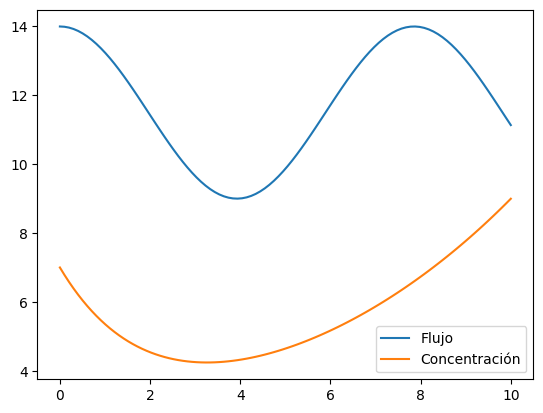

In [ ]:
#Aquí va su código
Q = lambda t: 9 + 5*np.cos(0.4*t)**2
c = lambda t: 5*np.exp(-0.5*t) + 2*np.exp(0.15*t)
t = np.linspace(0, 10, 100)
plt.plot(t, Q(t), label='Flujo')
plt.plot(t, c(t), label='Concentración')
plt.legend()
plt.show()

In [ ]:
M = lambda t: Q(t)*c(t)
t1, t2 = 2, 8
integral_romberg = romberg(M, t1, t2)
print(f"El valor de la integral es: {integral}")
integral_quad = quad(M, t1, t2)
print(f"El error de romberg respecto a quad es: {abs(integral_quad[0]- integral_romberg + integral_quad[1])}")



El valor de la integral es: 0.36033449485443175
El error de romberg respecto a quad es: 4.184680713743846e-12


<ipython-input-12-63d1e1e4091e>:3: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  integral_romberg = romberg(M, t1, t2)


#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
#Aquí va su código
m = 1.0  # masa
g = 9.81  # aceleración de la gravedad
b = 1.0  # longitud del péndulo
I0 = 0.1  # momento de inercia
theta0 = np.radians(30)
P0 = 2 * np.pi * np.sqrt(I0 / (m * g * b))
k = np.sin(theta0 / 2)
f = lambda phi: (2/np.pi)*P0/(np.sqrt(1 - k**2 * np.sin(phi)**2))
integral, error = quad(f, 0, np.pi/2)
print(f"El periodo de oscilación es: {integral}")


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
#Aquí va su código
f = lambda t: 22.8 / (3.5 + 7 * (t - 1.25)**4)
t1, t2 = 0, 240
integral, error = quad(f, t1, t2)
print(f"El número total de autos que cruzan el puente entre las 4 y las 6 pm es: {integral}")
print(f"El error de la estimación es: {error}")

#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
#Aquí va su código
a = 1
I = 3
miu0_4pi = 1
r_values = np.linspace(1.05, 2, 100)
theta_values = np.linspace(0, np.pi/2, 100)
k2 = lambda r, theta: (4*a*r*np.sin(theta))/(a**2 + r**2 + 2*a*r*np.sin(theta))
K_k = lambda k: 1/(np.sqrt(1-k**2*np.sin(k)**2))
E_k = lambda k: k*np.sqrt(1-k**2*np.sin(k)**2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipe

# Parámetros dados
a = 1  # radio del lazo de corriente
I = 3  # corriente en amperios
mu_0_4pi = 1  # constante mu_0 / 4π
r_values = np.linspace(1.05, 2, 100)  # valores de r
theta_values = np.linspace(0, np.pi/2, 100)  # valores de θ

# Función para calcular k^2
def calculate_k2(r, theta, a):
    return (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))

# Función para calcular A_ϕ
def A_phi(r, theta, a, I, mu_0_4pi):
    k2 = calculate_k2(r, theta, a)
    k = np.sqrt(k2)

    # Cálculo de las integrales elípticas de primera y segunda especie
    K = ellipk(k2)  # K(k)
    E = ellipe(k2)  # E(k)

    prefactor = (mu_0_4pi * I * (a**2 + r**2 + 2 * a * r * np.sin(theta))**(1/2)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))**(1/2)
    A_phi_value = prefactor * ((2 - k2) * K - 2 * E * k2)
    return A_phi_value

# Graficar A_ϕ(r = 1.1, θ) vs θ
r_fixed = 1.1
A_phi_values_theta = [A_phi(r_fixed, theta, a, I, mu_0_4pi) for theta in theta_values]

plt.figure(figsize=(8, 6))
plt.plot(theta_values, A_phi_values_theta, label=r"$A_\phi(r=1.1, \theta)$")
plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel(r"$A_\phi$", fontsize=14)
plt.title(r"Componente $A_\phi(r = 1.1, \theta)$ vs $\theta$", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Graficar A_ϕ(r, θ = π/3) vs r
theta_fixed = np.pi / 3
A_phi_values_r = [A_phi(r, theta_fixed, a, I, mu_0_4pi) for r in r_values]

plt.figure(figsize=(8, 6))
plt.plot(r_values, A_phi_values_r, label=r"$A_\phi(r, \theta=\pi/3)$")
plt.xlabel(r"$r$", fontsize=14)
plt.ylabel(r"$A_\phi$", fontsize=14)
plt.title(r"Componente $A_\phi(r, \theta = \pi/3)$ vs $r$", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()